In this project, you'll work with a dataset with 21,000 properties for sale in Mexico through the real estate website <a href = https://properati.com/>Properati.com</a>. Your goal is to determine whether sale prices are influenced more by property size or location.

Some of the things you'll learn in this project are:

- How to organize information using basic Python data structures.
- How to import data from CSV files and clean it using the pandas library.
- How to create data visualizations like scatter and box plots.
- How to examine the relationship between two variables using correlation.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

# 1. Preparing Data

The first part of any data science project is preparing your data, which means making sure its in the right place and format for you to conduct your analysis. The first step of any data preparation is importing your raw data and cleaning it. 

If you look in the `data` directory, you'll see that the data for this project comes in three CSV files: `mexico-real-estate-1.csv`, `mexico-real-estate-2.csv`, and `mexico-real-estate-3.csv`.

**Task 1.1:** Read these three files into three separate DataFrames named `df1`, `df2`, and `df3`, respectively.

In [2]:
# Load CSV files into DataFrames
df1 = pd.read_csv("data/mexico-real-estate-1.csv", sep=";", encoding="latin-1")
df2 = pd.read_csv("data/mexico-real-estate-2.csv", sep=";", encoding="latin-1")
df3 = pd.read_csv("data/mexico-real-estate-3.csv", sep=";", encoding="latin-1")

# Print object type and shape for DataFrames
print("df1 type:", type(df1))
print("df1 shape:", df1.shape)
print()
print("df2 type:", type(df2))
print("df2 shape:", df2.shape)
print()
print("df3 type:", type(df3))
print("df3 shape:", df3.shape)

df1 type: <class 'pandas.core.frame.DataFrame'>
df1 shape: (700, 6)

df2 type: <class 'pandas.core.frame.DataFrame'>
df2 shape: (700, 6)

df3 type: <class 'pandas.core.frame.DataFrame'>
df3 shape: (700, 5)


Now that you have your three DataFrames, it's time to inspect them to see if they need any cleaning. Let's look at them one-by-one.

**Task 1.2:** Inspect `df1` by looking at its [`shape`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html) attribute. Then use the [`info`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.htm) method to see the data types and number of missing values for each column. Finally, use the [`head`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html) method to determine to look at the first five rows of your dataset.

In [3]:
# Print df1 shape
print("df1 shape:", df1.shape)
# Print df1 info
df1.info()

# Get output of df1 head
df1.head()

df1 shape: (700, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  700 non-null    object 
 1   state          700 non-null    object 
 2   lat            583 non-null    float64
 3   lon            583 non-null    float64
 4   area_m2        700 non-null    float64
 5   price_usd      700 non-null    object 
dtypes: float64(3), object(3)
memory usage: 32.9+ KB


,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150.0,"$67,965.56"
1,house,Nuevo León,25.688436,-100.198807,186.0,"$63,223.78"
2,apartment,Guerrero,16.767704,-99.764383,82.0,"$84,298.37"
3,apartment,Guerrero,16.829782,-99.911012,150.0,"$94,308.80"
4,house,Veracruz de Ignacio de la Llave,NaN,NaN,175.0,"$94,835.67"


It looks like there are a couple of problems in this DataFrame that you need to solve. First, there are many rows with `NaN` values in the `"lat"` and `"lon"` columns. Second, the data type for the `"price_usd"` column is `object` when it should be `float`. 

**Task 1.3:** Clean `df1` by dropping rows with `NaN` values. Then remove the `"$"` and `","` characters from `"price_usd"` and recast the values in the column as floats.

In [4]:
# Drop null values from df1
df1.dropna(inplace=True)
# Clean "price_usd" column in df1
df1["price_usd"] = df1["price_usd"].str.replace("$", "", regex=False).str.replace(",", "", regex=False).astype(float)

# Print object type, shape, and head
print("df1 type:", type(df1))
print("df1 shape:", df1.shape)
df1.head()

df1 type: <class 'pandas.core.frame.DataFrame'>
df1 shape: (583, 6)


,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150.0,67965.56
1,house,Nuevo León,25.688436,-100.198807,186.0,63223.78
2,apartment,Guerrero,16.767704,-99.764383,82.0,84298.37
3,apartment,Guerrero,16.829782,-99.911012,150.0,94308.80
5,house,Yucatán,21.052583,-89.538639,205.0,105191.37


Now it's time to tackle `df2`. Take a moment to inspect it using the same commands you used before. You'll notice that it has the same issue of `NaN` values, but there's a new problem, too: The home prices are in Mexican pesos (`"price_mxn"`), not US dollars (`"price_usd"`). If we want to compare all the home prices in this dataset, they all need to be in the same currency.

**Task 1.4:** First, drop rows with `NaN` values in `df2`. Next, use the `"price_mxn"` column to create a new column named `"price_usd"`. (Keep in mind that, when this data was collected in 2014, a dollar cost 19 pesos.) Finally, drop the `"price_mxn"` from the DataFrame.

In [5]:
# Drop null values from df2
df2.dropna(inplace=True)
# Create "price_usd" column for df2 (19 pesos to the dollar in 2014)
df2["price_usd"] = df2["price_mxn"] / 19

# Drop "price_mxn" column from df2
df2.drop(columns=["price_mxn"], inplace=True)

# Print object type, shape, and head
print("df2 type:", type(df2))
print("df2 shape:", df2.shape)
df2.head()

df2 type: <class 'pandas.core.frame.DataFrame'>
df2 shape: (571, 6)


,property_type,state,lat,lon,area_m2,price_usd
0,apartment,Nuevo León,25.721081,-100.345581,72.0,68421.052632
2,house,Morelos,23.634501,-102.552788,360.0,278947.368421
6,apartment,Estado de México,19.272040,-99.572013,85.0,65789.473684
7,house,San Luis Potosí,22.138882,-100.996510,158.0,111578.947368
8,apartment,Distrito Federal,19.394558,-99.129707,65.0,39904.736842


In [6]:
df3.info()
df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            700 non-null    object 
 1   place_with_parent_names  700 non-null    object 
 2   lat-lon                  582 non-null    object 
 3   area_m2                  700 non-null    float64
 4   price_usd                700 non-null    float64
dtypes: float64(2), object(3)
memory usage: 27.5+ KB


,property_type,place_with_parent_names,lat-lon,area_m2,price_usd
0,apartment,|México|Distrito Federal|Gustavo A. Madero|Acu...,"19.52589,-99.151703",71.0,48550.59
1,house,|México|Estado de México|Toluca|Metepec|,"19.2640539,-99.5727534",233.0,168636.73
2,house,|México|Estado de México|Toluca|Toluca de Lerd...,"19.268629,-99.671722",300.0,86932.69
3,house,|México|Morelos|Temixco|Burgos Bugambilias|,NaN,275.0,263432.41
4,apartment,|México|Veracruz de Ignacio de la Llave|Veracruz|,"19.511938,-96.871956",84.0,68508.67


We're now on the final DataFrame. Use the same `shape`, `info` and `head` commands to inspect the `df3`. Do you see any familiar issues? 

You'll notice that we still have `NaN` values, but there are two new problems:

1. Instead of separate `"lat"` and `"lon"` columns, there's a single `"lat-lon"` column. 
2. Instead of a `"state"` column, there's a `"place_with_parent_names"` column.

We need the resolve these problems so that `df3` has the same columns in the same format as `df1` and `df2`.

**Task 1.5:** Drop rows with `NaN` values in `df3`. Then use a method to create two new columns from `"lat-lon"` named `"lat"` and `"lon"`, respectively.

In [7]:
# Drop null values from df3
df3.dropna(inplace=True)
# Create "lat" and "lon" columns for df3

df3[["lat", "lon"]] = df3["lat-lon"].str.split(",", expand=True).astype(float)


# Print object type, shape, and head
print("df3 type:", type(df3))
print("df3 shape:", df3.shape)
df3.head()

df3 type: <class 'pandas.core.frame.DataFrame'>
df3 shape: (582, 7)


,property_type,place_with_parent_names,lat-lon,area_m2,price_usd,lat,lon
0,apartment,|México|Distrito Federal|Gustavo A. Madero|Acu...,"19.52589,-99.151703",71.0,48550.59,19.525890,-99.151703
1,house,|México|Estado de México|Toluca|Metepec|,"19.2640539,-99.5727534",233.0,168636.73,19.264054,-99.572753
2,house,|México|Estado de México|Toluca|Toluca de Lerd...,"19.268629,-99.671722",300.0,86932.69,19.268629,-99.671722
4,apartment,|México|Veracruz de Ignacio de la Llave|Veracruz|,"19.511938,-96.871956",84.0,68508.67,19.511938,-96.871956
5,house,|México|Jalisco|Guadalajara|,"20.689157,-103.366728",175.0,102763.00,20.689157,-103.366728


**Task 1.6:** Extract the state for every house. (Note that the state name always appears after `"México|"` in each string.) Use this information to create a `"state"` column. Finally, drop the `"place_with_parent_names"` and `"lat-lon"` columns from the DataFrame. 

In [8]:
# Create "state" column for df3
df3["state"] = df3["place_with_parent_names"].str.split("|", expand=True)[2]

# Drop "place_with_parent_names" and "lat-lon" from df3
df3.drop(columns = ["place_with_parent_names", "lat-lon"], inplace=True)

# Print object type, shape, and head
print("df3 type:", type(df3))
print("df3 shape:", df3.shape)
df3.head()

df3 type: <class 'pandas.core.frame.DataFrame'>
df3 shape: (582, 6)


,property_type,area_m2,price_usd,lat,lon,state
0,apartment,71.0,48550.59,19.525890,-99.151703,Distrito Federal
1,house,233.0,168636.73,19.264054,-99.572753,Estado de México
2,house,300.0,86932.69,19.268629,-99.671722,Estado de México
4,apartment,84.0,68508.67,19.511938,-96.871956,Veracruz de Ignacio de la Llave
5,house,175.0,102763.00,20.689157,-103.366728,Jalisco


You have three clean DataFrames, and now it's time to combine them into a single DataFrame so that you can conduct your analysis

**Task 1.7:** Concatenate `df1`, `df2`, `df3` as new DataFrame named `df`. Your new DataFrame should normally have 1,736 rows and 6 columns:`"property_type"`, `"state"`, `"lat"`, `"lon"`, `"area_m2"`, and `"price_usd"`. 

In [9]:
# Concatenate df1, df2, and df3
df = pd.concat([df1, df2, df3], ignore_index=True)

# Print object type, shape, and head
print("df type:", type(df))
print("df shape:", df.shape)
df.head()

df type: <class 'pandas.core.frame.DataFrame'>
df shape: (1736, 6)


,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150.0,67965.56
1,house,Nuevo León,25.688436,-100.198807,186.0,63223.78
2,apartment,Guerrero,16.767704,-99.764383,82.0,84298.37
3,apartment,Guerrero,16.829782,-99.911012,150.0,94308.80
4,house,Yucatán,21.052583,-89.538639,205.0,105191.37


**Task 1.8:** Save `df` as a CSV file. The file path should be `"data/mexico-real-estate-clean.csv"`. Be sure to set the `index` argument to `False`.

In [10]:
# Save df
df.to_csv("data/mexico-real-estate-cleaned.csv", index=False)   

# 2. Exploratory Data Analysis

After importing, the next step in many data science projects is exploratory data analysis (EDA), where you get a feel for your data by summarizing its main characteristics using descriptive statistics and data visualization. A good way to plan your EDA is by looking each column and asking yourself questions what it says about your dataset.

They say that the most important thing in real estate is location, and we can see that our houses in Mexico are located by using the `"lat"` and `"lon"` columns. Since latitude and longitude are based on a coordinate system, a good way to visualize them is to create a scatter plot on top of a map. A great tool for this is the [`scatter_mapbox`](https://plotly.github.io/plotly.py-docs/generated/plotly.express.scatter_mapbox.html) from the plotly library.

In [11]:
# Use plotly express to create figure
fig = px.scatter_mapbox(
    df,  # Our DataFrame
    lat="lat",  
    lon="lon", 
    center={"lat": 19.43, "lon": -99.13},  # Map will be centered on Mexico City where lat=19.43 and lon=-99.13
    width=600,  # Width of map
    height=600,  # Height of map
    hover_data=["price_usd"],  # Display price when hovering mouse over house
)

# Add mapbox_style to figure layout
fig.update_layout(mapbox_style="open-street-map")

# Show figure
fig.show()

You see a map that's centered on Mexico City, and you can use the "Zoom Out" button in the upper-right corner of the map so that you can see the whole country.

Looking at this map, are the houses in our dataset distributed evenly throughout the country, or are there states or regions that are more prevalent? Can you guess where Mexico's biggest cities are based on this distribution?

**Task 2.1:** Let's determine the 10 most prevalent states in our dataset.

In [12]:
# Get value counts of "state" column
df["state"].value_counts()

Distrito Federal                   303
Estado de México                   179
Yucatán                            171
Morelos                            160
Querétaro                          128
Veracruz de Ignacio de la Llave    117
Puebla                              95
Nuevo León                          83
Jalisco                             60
San Luis Potosí                     55
Chiapas                             55
Guerrero                            49
Tamaulipas                          48
Quintana Roo                        38
Baja California                     29
Sinaloa                             26
Chihuahua                           20
Tabasco                             20
Hidalgo                             17
Baja California Sur                 15
Sonora                              12
Guanajuato                          12
Aguascalientes                      10
Nayarit                              9
Durango                              7
Tlaxcala                 

In [13]:
# Describe "area_m2", "price_usd" columns
df[["area_m2", "price_usd"]].describe()

,area_m2,price_usd
count,1736.000000,1736.000000
mean,170.261521,115331.980800
std,80.594539,65426.173793
min,60.000000,33157.894737
25%,101.750000,65789.473684
50%,156.000000,99262.132105
75%,220.000000,150846.665000
max,385.000000,326733.660000


Let's start by looking at `"area_m2"`. It's interesting that the mean is larger than the median (another name for the 50% quartile). Both of these statistics are supposed to give an idea of the "typical" value for the column, so why is there a difference of almost 15 m<sup>2</sup> between them? To answer this question, we need to see how house sizes are distributed in our dataset. Let's look at two ways to visualize the distribution: a histogram and a boxplot.

**Task 2.2:** Create a histogram of `"area_m2"`.

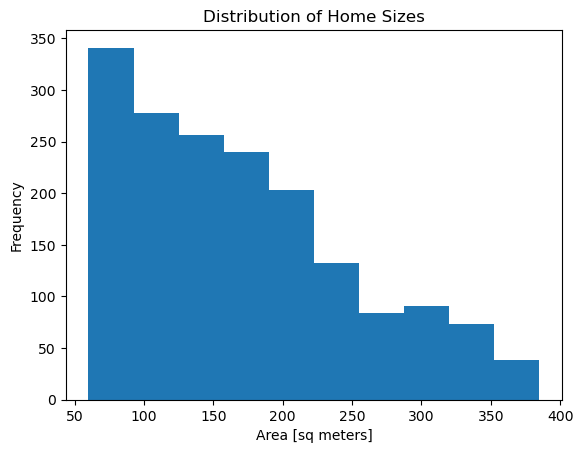

In [14]:
# Use Matplotlib to create histogram of "area_m2"
plt.hist(df["area_m2"])
# Add x-axis label
plt.xlabel("Area [sq meters]")
# Add y-axis label
plt.ylabel("Frequency")
# Add title
plt.title("Distribution of Home Sizes");

Looking at our histogram, we can see that `"area_m2"` skews right. In other words, there are more houses at the lower end of the distribution (50–200m<sup>2</sup>) than at the higher end (250–400m<sup>2</sup>). That explains the difference between the mean and the median.

**Task 2.3:** Create a horizontal boxplot of `"area_m2"`

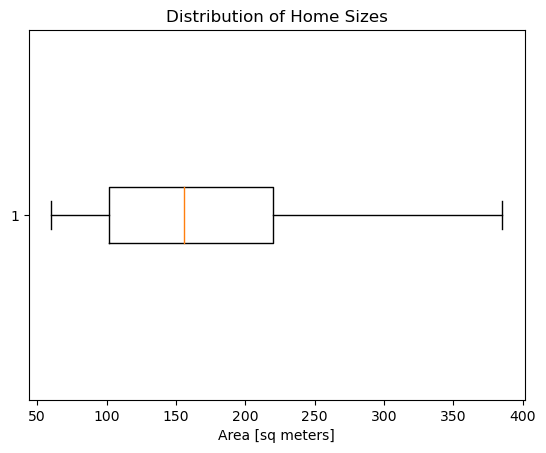

In [15]:
# Use Matplotlib to create boxplot of "area_m2"
plt.boxplot(df["area_m2"], vert=False)

# Add x-axis label
plt.xlabel("Area [sq meters]")
# Add title
plt.title("Distribution of Home Sizes");    

Does `"price_usd"` have the same distribution as `"price_per_m2"`? Let's use the same two visualization tools to find out.

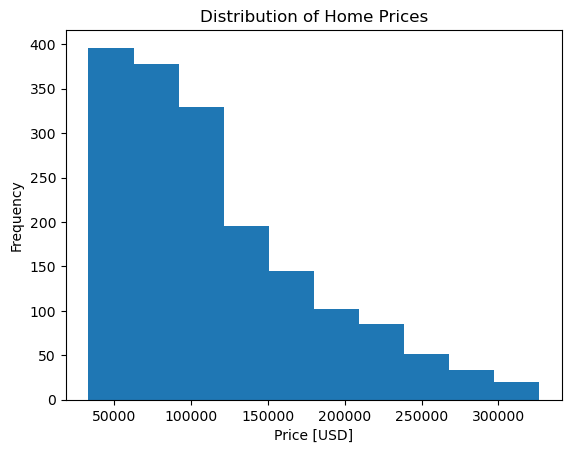

In [16]:
# Use Matplotlib to create histogram of "price_usd"
plt.hist(df["price_usd"])
# Add x-axis label
plt.xlabel("Price [USD]")

# Add y-axis label
plt.ylabel("Frequency")

# Add title
plt.title("Distribution of Home Prices");

Text(0, 0.5, 'Frequency')

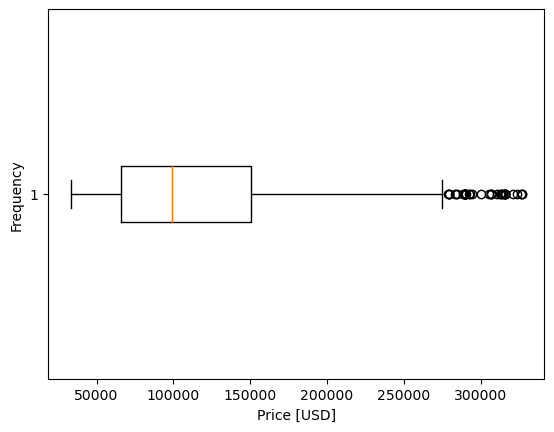

In [17]:
# Use Matplotlib to create boxplot of "price_usd"
plt.boxplot(df["price_usd"], vert=False)
# Add x-label axis
plt.xlabel("Price [USD]")

# Add y-label axis
plt.ylabel("Frequency")

# 3. Location or Size: What Influences House Prices in Mexico?

You've wrangled the data, you've gained an understanding of its basic characteristics in your EDA, and now it's time to ask some research questions.

#### Question 1: Which state has the most expensive real estate market?

Do housing prices vary by state? If so, which are the most expensive states for purchasing a home? During our exploratory data analysis, we used descriptive statistics like mean and median to get an idea of the "typical" house price in Mexico. Now, we need to break that calculation down by state and visualize the results.

We know in which state each house is located thanks to the `"state"` column. The next step is to divide our dataset into groups (one per state) and calculate the mean house price for each group.

**Task 3.1:** Create a Series named `mean_price_by_state`, where the index contains each state in the dataset and the values correspond to the mean house price for that state. To make it easier to read, we will sort them from highest to lowest mean price. 

In [18]:
# Declare variable `mean_price_by_state`
mean_price_by_state = df.groupby("state")["price_usd"].mean().reset_index(name="mean_price_usd").sort_values(by="mean_price_usd", ascending=False)

# Print object type, shape, and head
print("mean_price_by_state type:", type(mean_price_by_state))
print("mean_price_by_state shape:", mean_price_by_state.shape)
mean_price_by_state.head()

mean_price_by_state type: <class 'pandas.core.frame.DataFrame'>
mean_price_by_state shape: (30, 2)


,state,mean_price_usd
19,Querétaro,133955.913417
10,Guanajuato,133277.965833
16,Nuevo León,129221.985834
7,Distrito Federal,128347.267365
20,Quintana Roo,128065.415734


**Task 3.2:** Use `mean_price_by_state` to create a bar chart of your results. 

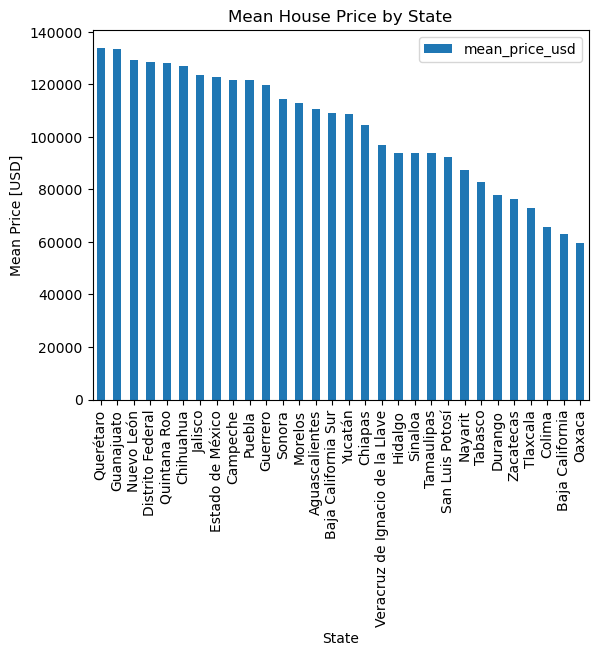

In [19]:
# Create bar chart from `mean_price_by_state` using pandas
mean_price_by_state.plot.bar(x="state", y="mean_price_usd")

# Add x-axis label
plt.xlabel("State")
# Add y-axis label
plt.ylabel("Mean Price [USD]")
# Add title
plt.title("Mean House Price by State");


It seems odd that Querétaro would be the most expensive real estate market in Mexico when, [according to recent GDP numbers](https://en.wikipedia.org/wiki/List_of_Mexican_states_by_GDP), it's not in the top 10 state economies. With all the variations in house sizes across states, a better metric to look at would be price per m<sup>2</sup>. In order to do that, we need to create a new column.

**Task 3.3:** Create a new column in `df` called `"price_per_m2"`. This should be the price for each house divided by it's size. 

In [20]:
# Create "price_per_m2" column
df["price_per_m2"] = df["price_usd"] / df["area_m2"]

# Print object type, shape, and head
print("df type:", type(df))
print("df shape:", df.shape)
df.head()

df type: <class 'pandas.core.frame.DataFrame'>
df shape: (1736, 7)


,property_type,state,lat,lon,area_m2,price_usd,price_per_m2
0,house,Estado de México,19.560181,-99.233528,150.0,67965.56,453.103733
1,house,Nuevo León,25.688436,-100.198807,186.0,63223.78,339.912796
2,apartment,Guerrero,16.767704,-99.764383,82.0,84298.37,1028.028902
3,apartment,Guerrero,16.829782,-99.911012,150.0,94308.80,628.725333
4,house,Yucatán,21.052583,-89.538639,205.0,105191.37,513.128634


Let's redo our bar chart from above, but this time with the mean of "price_per_m2" for each state.

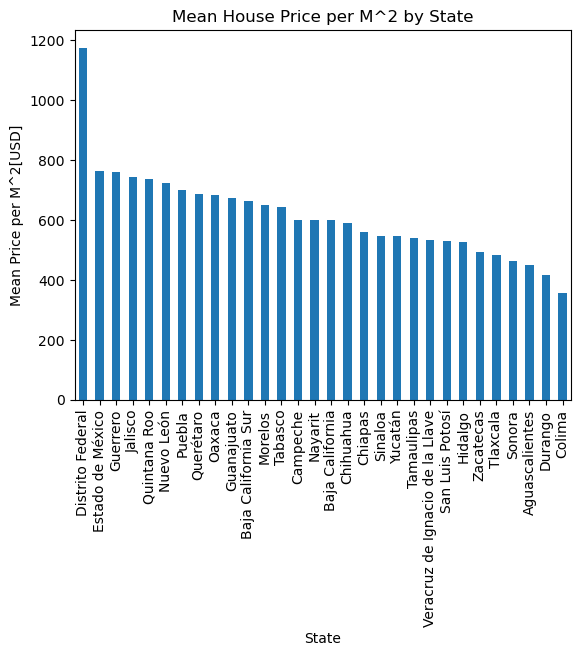

In [29]:
(
    df
    .groupby("state")
    ["price_per_m2"].mean()
    .sort_values(ascending=False)
    .plot(
        kind="bar",
        xlabel="State",
        ylabel="Mean Price per M^2[USD]",
        title="Mean House Price per M^2 by State"
    )
);

Now we see that the capital Mexico City (Distrito Federal) is by far the most expensive market. Additionally, many of the top 10 states by GDP are also in the top 10 most expensive real estate markets. So it looks like this bar chart is a more accurate reflection of state real estate markets.

#### Question 2 : Is there a relationship between home size and price?

From our previous question, we know that the location of a home affects its price (especially if it's in Mexico City), but what about home size? Does the size of a house influence price?

A scatter plot can be helpful when evaluating the relationship between two columns because it lets you see if two variables are correlated — in this case, if an increase in home size is associated with an increase in price.

**Task 3.4:** Create a scatter plot from `df` that represents price as a function of size. In other words, `"area_m2"` should be on the x-axis, and `"price_usd"` should be on the y-axis. 


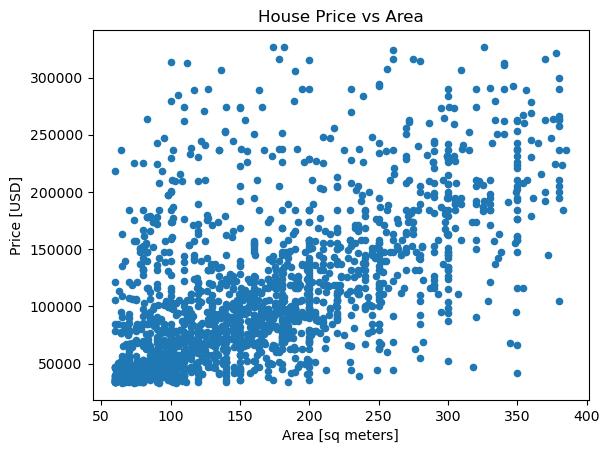

In [30]:
# Create scatter plot of "price_usd" vs "area_m2"

df.plot(
    kind="scatter",
    x="area_m2",
    y="price_usd",
    xlabel="Area [sq meters]",
    ylabel="Price [USD]",
    title="House Price vs Area"
);

**Task 3.5:** Calculate the Pearson correlation coefficient for `"area_m2"` and `"price_usd"`. 

In [34]:
# Calculate correlation of "price_usd" and "area_m2"
p_correlation = df["area_m2"].corr(df["price_usd"])

# Print correlation coefficient
print("Correlation of 'area_m2' and 'price_usd' (all Mexico):", p_correlation)

Correlation of 'area_m2' and 'price_usd' (all Mexico): 0.5855182454266905


The correlation coefficient is over 0.5, so there's a moderate relationship house size and price in Mexico. But does this relationship hold true in every state? Let's look at a couple of states, starting with Morelos

In [35]:
# Declare variable `df_morelos` by subsetting `df`
df_morelos = df[df["state"] == "Morelos"]

# Print object type, shape, and head
print("df_morelos type:", type(df_morelos))
print("df_morelos shape:", df_morelos.shape)
df_morelos.head()

df_morelos type: <class 'pandas.core.frame.DataFrame'>
df_morelos shape: (160, 7)


,property_type,state,lat,lon,area_m2,price_usd,price_per_m2
6,house,Morelos,18.812605,-98.954826,281.0,151509.56,539.179929
9,house,Morelos,18.804197,-98.932816,117.0,63223.78,540.374188
18,house,Morelos,18.855343,-99.241142,73.0,36775.16,503.769315
49,house,Morelos,18.804197,-98.932816,130.0,65858.10,506.600769
55,house,Morelos,18.960244,-99.212962,305.0,227351.46,745.414623


**Task 3.6:** Using `df_morelos`, create a scatter plot that shows price vs area.

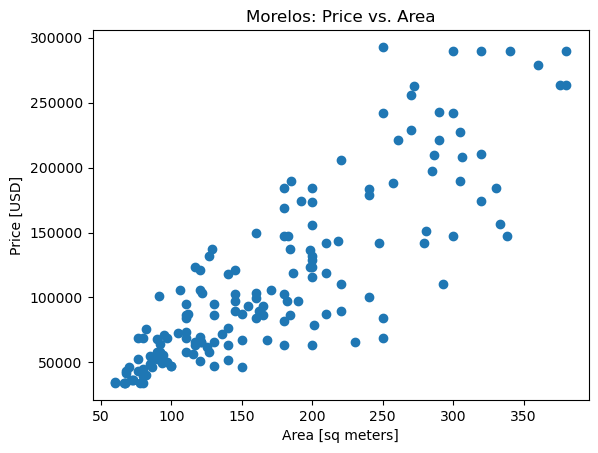

In [37]:
# Create scatter plot of "price_usd" vs "area_m2" in Morelos
plt.scatter(x=df_morelos["area_m2"], y=df_morelos["price_usd"])
# Add x-axis label
plt.xlabel("Area [sq meters]")

# Add y-axis label
plt.ylabel("Price [USD]")

# Add title
plt.title("Morelos: Price vs. Area");

It looks like the correlation is even stronger within Morelos. Let's calculate the correlation coefficient and verify that that's the case.

In [38]:
# Calculate correlation of "price_usd" and "area_m2" in `df_morelos`
p_correlation = df_morelos["area_m2"].corr(df_morelos["price_usd"])

# Print correlation coefficient
print("Correlation of 'area_m2' and 'price_usd' (Morelos):", p_correlation)

Correlation of 'area_m2' and 'price_usd' (Morelos): 0.8498077614061482


With a correlation coefficient that high, we can say that there's a strong relationship between house size and price in Morelos.

To conclude, let's look at the capital Mexico City (Distrito Federal).

**Task 3.7:** First, create a new DataFrame called `df_mexico_city` that includes all the observations from `df` that are part of the *Distrito Federal*. Next, create a scatter plot that shows price vs area. Don't forget to label the x- and y-axis and use the title `"Mexico City: Price vs. Area"`. Finally, calculate the  correlation coefficient for `"area_m2"` and `"price_usd"` in `df_mexico_city`.

df_mexico_city type: <class 'pandas.core.frame.DataFrame'>
df_mexico_city shape: (303, 7)
Correlation of 'area_m2' and 'price_usd' (Mexico City): 0.41070392058534355


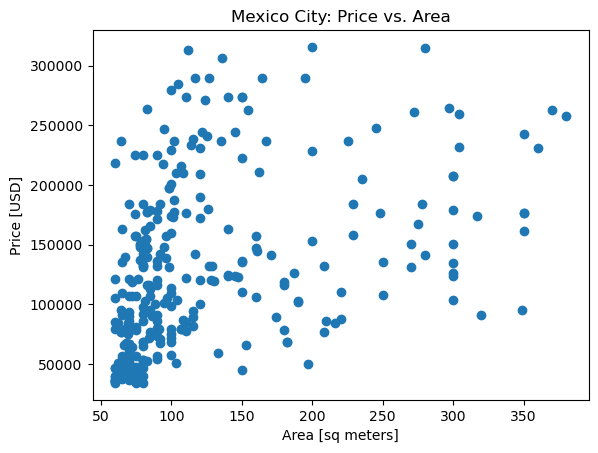

In [39]:
# Declare variable `df_mexico_city` by subsetting `df`
df_mexico_city = df[df["state"] == "Distrito Federal"]

# Print object type and shape
print("df_mexico_city type:", type(df_mexico_city))
print("df_mexico_city shape:", df_mexico_city.shape)

# Create a scatter plot "price_usd" vs "area_m2" in Distrito Federal
plt.scatter(x=df_mexico_city["area_m2"], y=df_mexico_city["price_usd"])  

# Add x-axis label
plt.xlabel("Area [sq meters]") 

# Add y-axis label
plt.ylabel("Price [USD]") 

# Add title
plt.title("Mexico City: Price vs. Area");

# Calculate correlation of "price_usd" and "area_m2" in `df_mexico_city`
p_correlation = df_mexico_city["area_m2"].corr(df_mexico_city["price_usd"])

# Print correlation coefficient
print("Correlation of 'area_m2' and 'price_usd' (Mexico City):", p_correlation)

Looking at the scatter plot and correlation coefficient, there's see a weak relationship between size and price in 'Distrito Federal'. How should we interpret this?

One interpretation is that the relationship we see between size and price in many states doesn't hold true in the country's biggest and most economically powerful urban center because there are other factors that have a larger influence on price. In fact, in the next project, we're going to look at another important Latin American city — Buenos Aires, Argentina — and build a model that predicts housing price by taking much more than size into account.